In [1]:
#Data Processing library
import pandas as pd
from sklearn.model_selection import train_test_split

#Model Libraries
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#Evaluation Libraries
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

#Evaluation Visualize
import matplotlib.pyplot as plt

#PipeLines
from sklearn.pipeline import make_pipeline

Data Processing 

In [2]:
train_data = pd.read_csv("processData/train.csv")
train_data.columns, train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 394 entries, Id to SalePrice
dtypes: float64(3), int64(391)
memory usage: 4.4 MB


(Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        ...
        'MoSold_11.0', 'MoSold_12.0', 'MoSold_nan', 'YrSold_2006.0',
        'YrSold_2007.0', 'YrSold_2008.0', 'YrSold_2009.0', 'YrSold_2010.0',
        'YrSold_nan', 'SalePrice'],
       dtype='object', length=394),
 None)

In [3]:
x_train_ = train_data.drop(['SalePrice','Id'], axis=1).copy()
y_train = train_data.SalePrice.copy()

In [4]:
x_submit_ = pd.read_csv("processData/test.csv")
x_submit = x_submit_.drop('Id', axis=1).copy()
y_submit = pd.read_csv('sample_submission.csv').SalePrice.copy()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_submit, y_submit, test_size=0.21)

In [6]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1152, 392), (307, 392), (1152,), (307,))

In [7]:
x_train.shape, y_train.shape

((1152, 392), (1152,))

Models

In [8]:
def best_model_selection(estimator:object, param_grid:dict):
    model = GridSearchCV(
        estimator, param_grid=param_grid, n_jobs=25, cv=80, refit=True,verbose=2, return_train_score=True
    )
    model.fit(X=x_train, y=y_train)
    return model.best_estimator_

In [9]:
dtr = DecisionTreeRegressor(
splitter='random',
max_depth=None, 
min_samples_leaf=2,
min_samples_split=4,
max_features='sqrt',
random_state=42,
max_leaf_nodes=1000,
min_impurity_decrease=0.009,
ccp_alpha=0.02,
min_impurity_split=0.00056)

abr = AdaBoostRegressor(
                        base_estimator=dtr, 
                        n_estimators=25, 
                        loss='square', 
                        random_state=42,
                        learning_rate=0.1,
                        )

rfr = RandomForestRegressor(
    n_estimators=25,
    max_depth=None, 
    min_samples_leaf=2,
    min_samples_split=4,
    min_weight_fraction_leaf=0.02,
    max_features='sqrt',
    max_leaf_nodes=1000,
    min_impurity_decrease=0.009,
    min_impurity_split=0.00056,
    n_jobs=15,
    random_state=42, 
    verbose=4,
    max_samples=500, 
    ccp_alpha=0.02
)

gbr = GradientBoostingRegressor(
    loss='lad',
    learning_rate=0.001,
    n_estimators=25,
    subsample=0.45,
    criterion='mse',
    min_samples_split=4,
    min_weight_fraction_leaf=0.02,
    max_depth=None,
    min_impurity_decrease=0.009, 
    min_impurity_split=0.00056,
    init=abr,
    random_state=42,
    max_features=300,
    alpha=0.01,
    verbose=4,
    max_leaf_nodes=1000,
    validation_fraction=0.1,
    ccp_alpha=0.02

)

xgbr = XGBRegressor(
    n_estimators=25,
    subsample=0.45,
    criterion='mse',
    min_samples_split=4,
    min_weight_fraction_leaf=0.02,
    max_depth=None,
    min_impurity_decrease=0.009, 
    min_impurity_split=0.00056,
    random_state=42,
    max_features=300,
    alpha=0.01,
    verbose=4,
    max_leaf_nodes=1000,
    validation_fraction=0.1,
    ccp_alpha=0.02,
    gamma=0.1,
    
    )

abr.fit(x_train, y_train, sample_weight=1/(1500*1500)), rfr.fit(x_train, y_train, sample_weight=1/(1500*1500)), dtr.fit(x_train, y_train, sample_weight=1/(1500*1500)),gbr.fit(x_train, y_train, sample_weight=1/(1500*1500)), xgbr.fit(x_train, y_train)

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25building tree 14 of 25
building tree 15 of 25building tree 16 of 25

building tree 17 of 25
building tree 18 of 25

building tree 19 of 25building tree 20 of 25

building tree 21 of 25building tree 22 of 25

building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        1657.8914           0.2875            0.36s
         2        1730.7836           0.1054            0.32s
         3        1766.3115           0.2487            0.32s
         4        1678.1238           0.2519            0.31s
         5        1908.2813           0.1213            0.29s
         6        1785.7591           0.2509            0.27s
         7        1527.1021           0.3163            0.27s
         8        1571.2798           0.0953            0.25s
         9        1705.3988           0.1083            0.23s
        10        1625.0748           0.0880            0.22s
        11        1713.6967           0.1294            0.20s
        12        1698.0085           0.0856            0.18s
        13        1731.0077           0.3230            0.16s


C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

        14        1585.3304           0.1245            0.15s
        15        2012.1321           0.1052            0.13s
        16        1789.1736           0.2680            0.12s
        17        1660.4774           0.2613            0.11s
        18        1750.8525           0.2015            0.09s
        19        1817.7348           0.1320            0.08s
        20        1791.5274           0.0984            0.07s
        21        1602.5685           0.0933            0.05s
        22        1839.3776           0.2460            0.04s
        23        1721.2577           0.0988            0.03s
        24        1728.0949           0.1672            0.01s
        25        1816.3496           0.1759            0.00s


C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

[09:19:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "ccp_alpha", "criterion", "max_features", "max_leaf_nodes", "min_impurity_decrease", "min_impurity_split", "min_samples_split", "min_weight_fraction_leaf", "validation_fraction", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.02,
                                                        max_features='sqrt',
                                                        max_leaf_nodes=1000,
                                                        min_impurity_decrease=0.009,
                                                        min_impurity_split=0.00056,
                                                        min_samples_leaf=2,
                                                        min_samples_split=4,
                                                        random_state=42,
                                                        splitter='random'),
                   learning_rate=0.1, loss='square', n_estimators=25,
                   random_state=42),
 RandomForestRegressor(ccp_alpha=0.02, max_features='sqrt', max_leaf_nodes=1000,
                       max_samples=500, min_impurity_decrease=0.009,
                       min_impurity_split=0.00

Evaluation

In [10]:
def evaluation(model,x_test, y_test):
    y_pred = model.predict(x_test)
    #print(model)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    print("MSE : {}".format(mse))
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    print("MAE : {}".format(mae))
    r2_s = r2_score(y_true=y_test, y_pred=y_pred)
    print("R2_Score : {}".format(r2_s))
    scores = model.score(X=x_test, y=y_test)
    print(f"{scores*100}:%percent accuracy")
    cv_score = cross_val_score(model, X=x_test, y=y_test, cv=5).mean()
    print("Cross Validation Score {}".format(cv_score))
    return mse, mae, r2_s, scores, cv_score

In [11]:
mse_list = []
mae_list = []
r2_list = []
scores_list = []
cv_score_list = []

for model in [dtr, abr, xgbr, gbr, rfr]:
    mse, mae, r2_s, scores, cv_score = evaluation(model=model, x_test=x_test, y_test=y_test)
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2_s)
    scores_list.append(scores)
    cv_score_list.append(cv_score)


MSE : 138744249.77874008
MAE : 7813.088950439869
R2_Score : 0.4291936450167769
42.91936450167769:%percent accuracy
Cross Validation Score -0.09332912531893789
MSE : 75201836.40089971
MAE : 5423.9790466590875
R2_Score : 0.6906128636502256
69.06128636502255:%percent accuracy


C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

Cross Validation Score 0.5681046207148145
MSE : 18606294.610690214
MAE : 2079.3570025493846
R2_Score : 0.923452026131468
92.34520261314681:%percent accuracy
[09:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "ccp_alpha", "criterion", "max_features", "max_leaf_nodes", "min_impurity_decrease", "min_impurity_split", "min_samples_split", "min_weight_fraction_leaf", "validation_fraction", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "ccp_alpha", "criterion", "max_features", "max_leaf_nodes", "min_impurity_decrease", "min_impurity_split", "min_samples_split", "min_weight_fraction_leaf", "vali

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2189.5561           0.2474            0.14s
         2        2111.5929          -0.0142            0.13s
         3        2051.1476           0.2066            0.13s
         4        2104.9734           0.2971            0.11s
         5        1924.4525           0.4030            0.11s
         6        1994.7513           0.1486            0.11s
         7        2127.3017           0.5777            0.10s
         8        2144.3699           0.4392            0.09s
         9        1956.9511          -0.0855            0.09s
        10        2060.2223           0.6258            0.08s
        11        2030.8672           0.1408            0.09s
        12        1869.6041           0.2995            0.08s
        13        2074.3544           0.0808            0.08s
        14        2448.5420           0.3194            0.07s
        15        2414.8764           0.4017            0.06s
       

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2281.1874           0.4057            0.13s
         2        2230.2761           0.3520            0.11s
         3        1973.3170           0.1599            0.10s
         4        2100.4747           0.1000            0.10s
         5        2259.6944           0.5568            0.12s
         6        2197.2602           0.3461            0.13s
         7        2101.4396           0.1582            0.12s
         8        1952.2033           0.0236            0.11s
         9        2326.1254           0.6740            0.10s
        10        2192.3569           0.4782            0.10s
        11        2058.8675           0.2039            0.10s
        12        2127.2961           0.4552            0.11s
        13        2097.2106           0.2423            0.10s
        14        2530.5856           0.3663            0.09s
        15        2265.8290           0.2149            0.08s
       

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2065.4954           0.0278            0.10s
         2        2163.1392           0.1631            0.10s
         3        2314.9239           0.2969            0.10s
         4        1947.1500           0.7305            0.10s
         5        2135.0850           0.2658            0.10s
         6        1865.4587           0.5637            0.09s
         7        1994.0207           0.0741            0.10s
         8        1890.6945           0.2336            0.09s
         9        2165.8627           0.5743            0.09s
        10        1961.7864           0.6294            0.08s
        11        2065.2741          -0.1310            0.07s
        12        1744.8846           0.3030            0.07s
        13        1687.5054          -0.0795            0.07s
        14        1830.5349           0.2560            0.06s
        15        1638.8330          -0.0345            0.05s
       

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2124.9590           0.2636            0.15s
         2        2236.9766           0.4500            0.14s
         3        2212.7557           0.3726            0.12s
         4        1980.3025           0.7168            0.13s
         5        1865.3596           0.4875            0.12s
         6        1798.5430           0.0305            0.12s
         7        2021.7324           0.1097            0.11s
         8        2103.1999           0.4767            0.10s
         9        2235.6496           0.3130            0.09s
        10        2217.9747           0.3943            0.09s
        11        1913.0730           0.0416            0.08s
        12        1611.1651           0.0907            0.07s
        13        2018.7952           0.1794            0.07s
        14        2063.2312           0.3688            0.06s
        15        1672.5176           0.3810            0.05s
       

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        2053.3879           0.2844            0.10s
         2        1961.2859           0.1240            0.13s
         3        2136.3817           0.5277            0.13s
         4        2333.0429           0.4280            0.12s
         5        2215.8110           0.3265            0.11s
         6        2213.8748           0.1378            0.11s
         7        2209.3968           0.3695            0.10s
         8        2069.1469           0.5258            0.10s
         9        2105.8535          -0.0356            0.09s
        10        1966.5245           0.3014            0.09s
        11        2332.0862           0.3809            0.08s
        12        1725.1541          -0.0089            0.07s
        13        1967.8094           0.0103            0.07s
        14        2078.6400           0.3727            0.06s
        15        1901.8462           0.1504            0.05s
       

C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(
C:\Users\MIJANUR REHMAN\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:315: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter ins

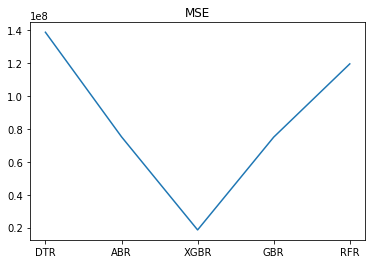

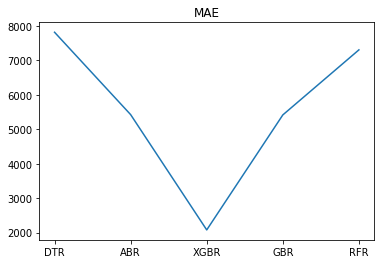

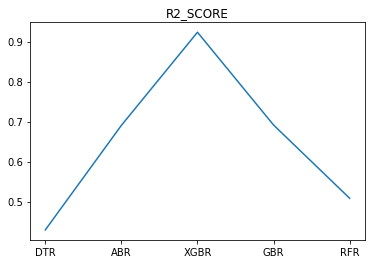

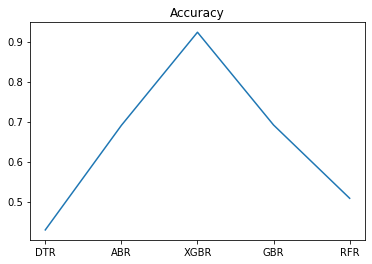

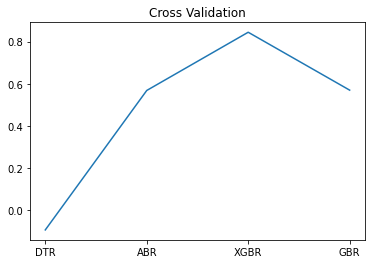

In [12]:
for (evaluate_list, name) in zip([mse_list, mae_list, r2_list, scores_list, cv_score_list], ["MSE", 'MAE', 'R2_SCORE', "Accuracy", 'Cross Validation']):
    plt.plot(['DTR', "ABR", 'XGBR', "GBR", "RFR"], evaluate_list)
    plt.title(name)
    plt.show()

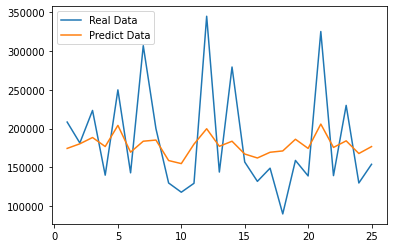

In [13]:
y_pred =xgbr.predict(x_train_[:25])
plt.plot(train_data['Id'][:25], train_data['SalePrice'][:25], label="Real Data")
plt.plot(train_data['Id'][:25], y_pred, label='Predict Data')
plt.legend()
plt.show()

In [14]:
y_submit_pred = xgbr.predict(x_submit)
import numpy as np


In [15]:
submission = pd.DataFrame(data={"Id":np.array(x_submit_['Id']),"SalePrice":y_submit_pred})
submission.head()

,Id,SalePrice
0,1461,170317.515625
1,1462,186584.359375
2,1463,183803.890625
3,1464,178981.843750
4,1465,149004.156250


In [16]:
submission.to_csv("processData/sample_submission.csv",index=False)